In [1]:
from scipy.stats import zscore
import sweetviz as sv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#modelos
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier


In [2]:
model1 = pd.read_csv('data/gender_submission.csv')
test1 = pd.read_csv('data/test.csv')
train1 = pd.read_csv('data/train.csv')

# Visualizacion de datos

## Visualizacion del dataset

### Model1 gender_submission

In [6]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [7]:
model1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
model1.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


### test

In [10]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [58]:
varNumericasSinY=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [59]:
for i in varNumericasSinY:
    print("------------------")
    print(test1[i].value_counts())

------------------
PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64
------------------
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
------------------
Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64
------------------
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
------------------
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
------------------
Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64


### train

In [61]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
varNumericas = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]
varCategoricas = ["Name","Sex","Ticket","Cabin","Embarked"]

In [65]:
for i in varNumericas:
    print("------------------")
    print(train1[i].value_counts())

------------------
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
------------------
Survived
0    549
1    342
Name: count, dtype: int64
------------------
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
------------------
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
------------------
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
------------------
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
------------------
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


In [66]:
for i in varCategoricas:
    print("------------------")
    print(train1[i].value_counts())

------------------
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
------------------
Sex
male      577
female    314
Name: count, dtype: int64
------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
------------------
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34     

In [67]:
train1['Parch'] = train1['Parch'].apply(lambda x: 1 if x > 0 else 0)

In [68]:
train1['SibSp'] = train1['SibSp'].apply(lambda x: 1 if x > 0 else 0)

In [69]:
test1['Parch'] = test1['Parch'].apply(lambda x: 1 if x > 0 else 0)

In [70]:
test1['SibSp'] = test1['SibSp'].apply(lambda x: 1 if x > 0 else 0)

## Limpieza de datos

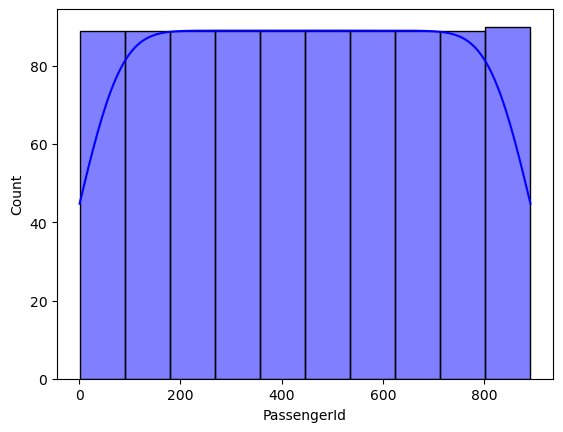

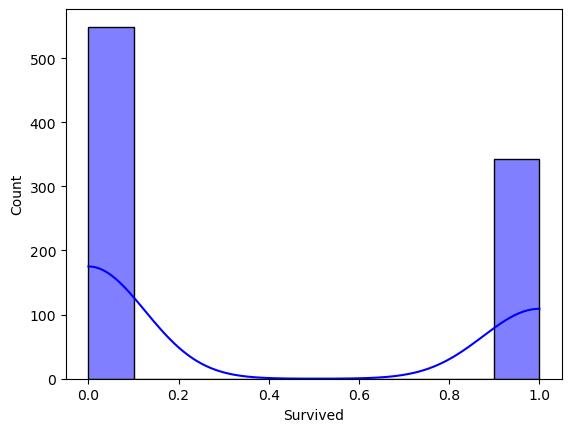

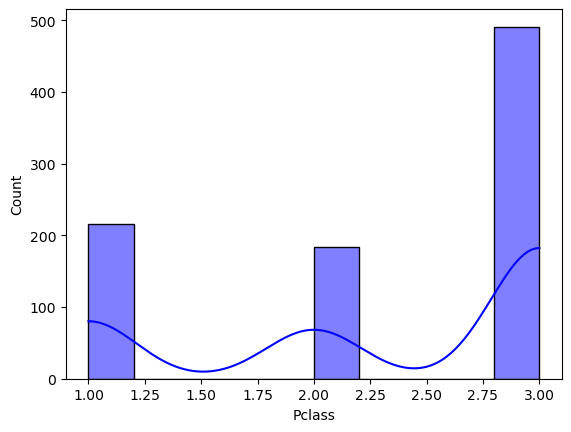

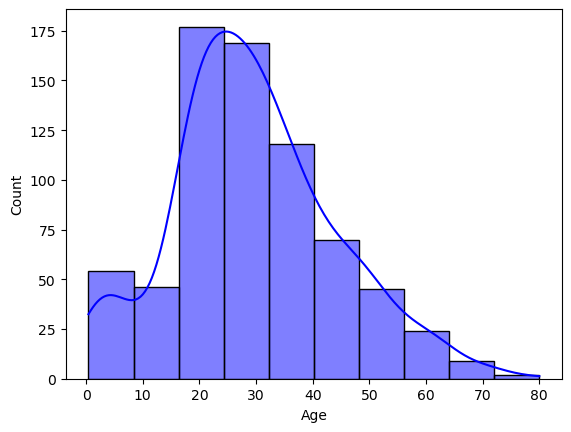

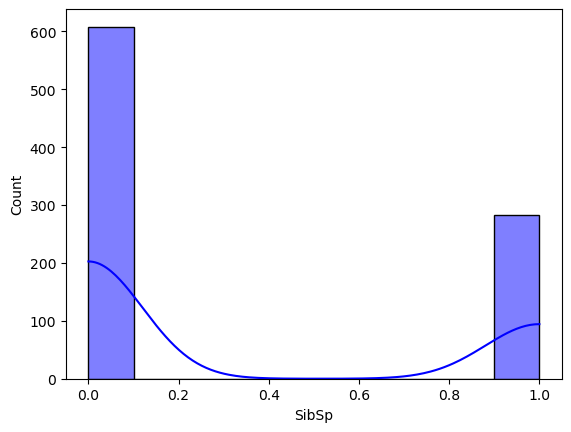

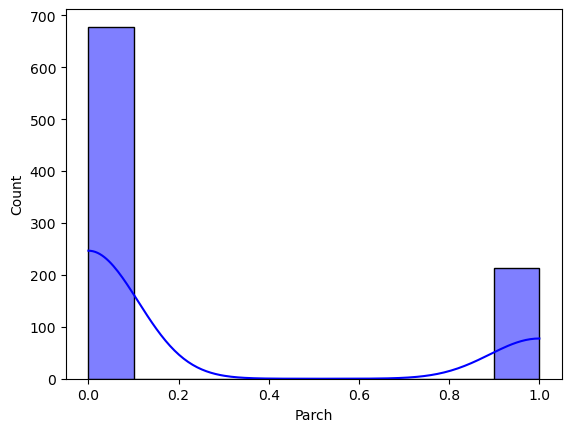

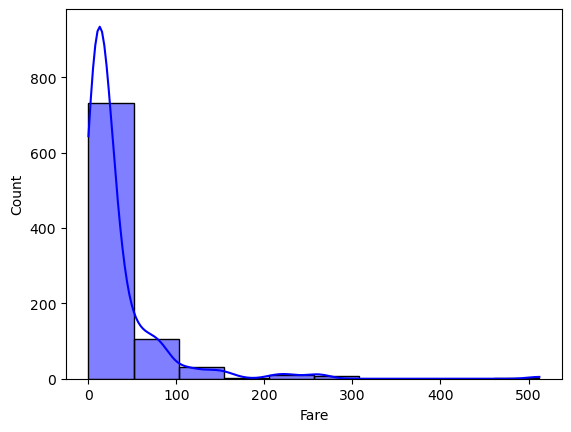

In [72]:
# Limpieza de outliers
for i in varNumericas:
    # Crear el histograma con Seaborn
    sns.histplot(train1[i], bins=10, kde=True, color='blue')
    
    # Mostrar el gráfico
    plt.show()
    

In [73]:
# Calcular el Z-score y agregar como una nueva columna
train1['zFare'] = zscore(train1['Fare'])

In [74]:
# Normalizar la columna 'edad' usando Min-Max
train1['mFare'] = (train1['Fare'] - train1['Fare'].min()) / (train1['Fare'].max() - train1['Fare'].min())

In [75]:
varNumericas.append('mFare')

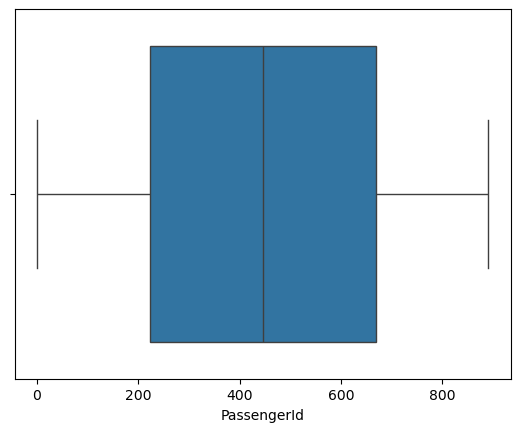

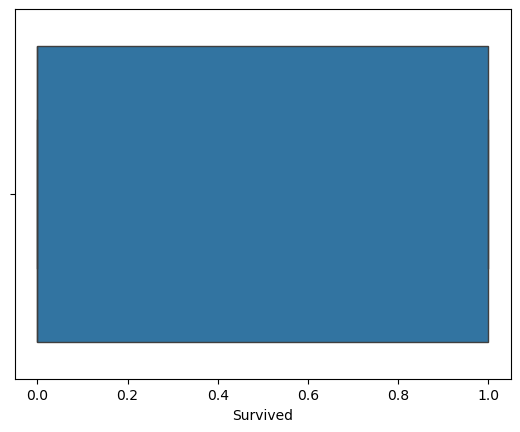

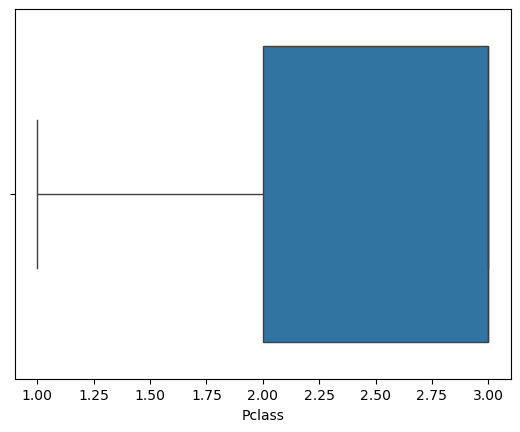

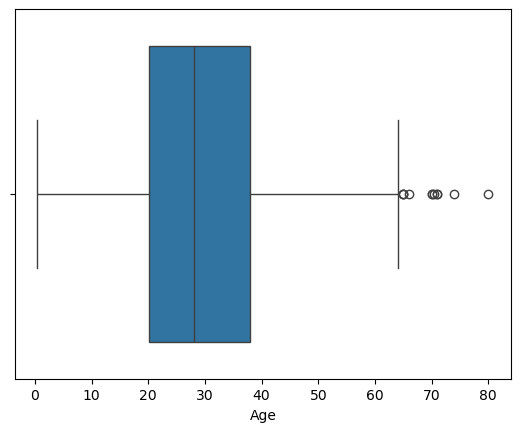

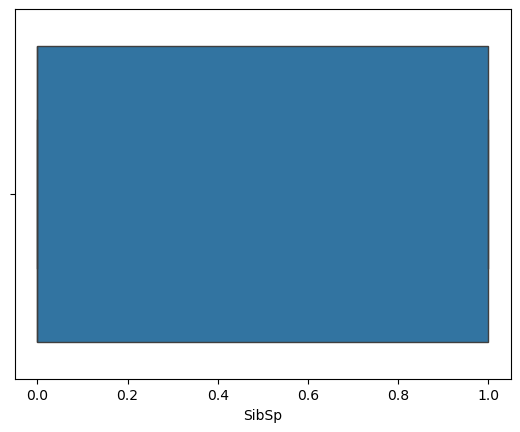

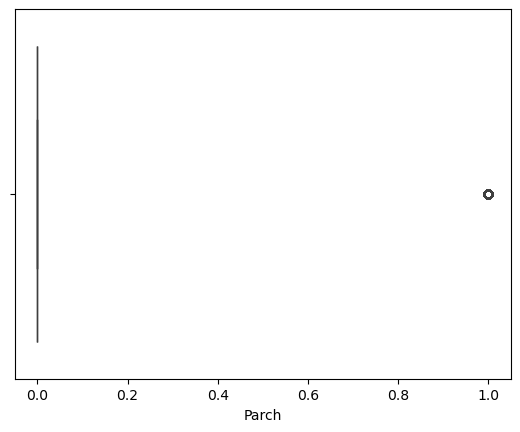

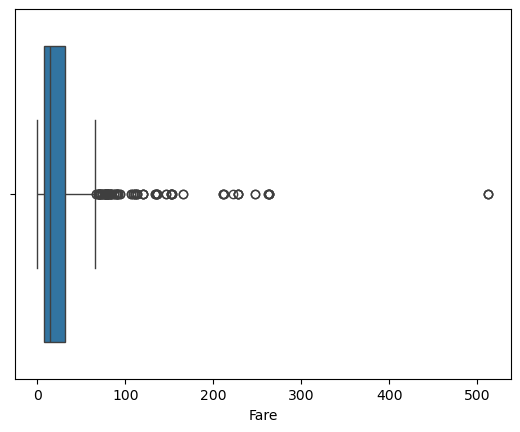

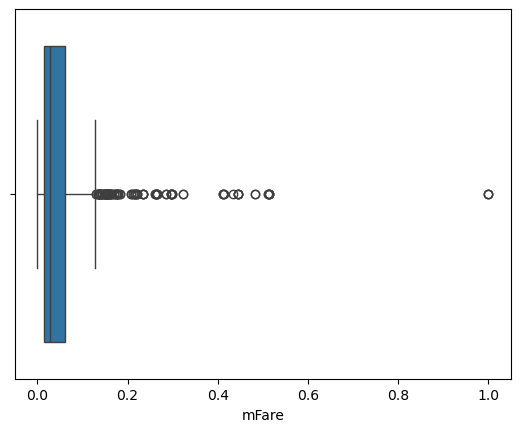

In [76]:
for i in varNumericas:
    # Crear el boxplot con Seaborn
    sns.boxplot(x=train1[i])
    
    # Mostrar el gráfico
    plt.show()

In [77]:
# Calcular la media de edad por clase
media_por_clase = train1.groupby('Pclass')['Age'].mean()

# Mostrar el resultado
print(media_por_clase)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [78]:
# Aplicar One Hot Encoding a la columna 'género'
train1 = pd.get_dummies(train1, columns=['Embarked'], prefix='Embarked')

In [79]:
# Aplicar One Hot Encoding a la columna 'género'
train1 = pd.get_dummies(train1, columns=['Pclass'], prefix='Pclass')
train1.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,zFare,mFare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,-0.502445,0.014151,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.786845,0.139136,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.488854,0.015469,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.420730,0.103644,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,-0.486337,0.015713,False,False,True,False,False,True


In [80]:
print(train1)

     PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
888          889         0           Johnston, Miss. Catherine Helen "Carrie"   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  P

In [81]:
train1.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,zFare,mFare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,-0.502445,0.014151,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.786845,0.139136,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.488854,0.015469,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.420730,0.103644,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,-0.486337,0.015713,False,False,True,False,False,True


In [113]:
# Reemplazar True/False por 1/0
train1['Embarked_C'] = train1['Embarked_C'].astype(int)
train1['Embarked_Q'] = train1['Embarked_Q'].astype(int)
train1['Embarked_S'] = train1['Embarked_S'].astype(int)

In [114]:
train1.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,zFare,mFare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,-0.502445,0.014151,0,0,1,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.786845,0.139136,1,0,0,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.488854,0.015469,0,0,1,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.420730,0.103644,0,0,1,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,-0.486337,0.015713,0,0,1,False,False,True


In [ ]:
# Variables con nulos: Age, Cabin, Embarked

# Variables con outliers: 

In [216]:
# Comparar dos datasets
reporte = sv.compare([train1, "Train"], [test1, "Test"])
reporte.show_html('reporte_comparacion.html')

                                             |                                             | [  0%]   00:00 ->…

Report reporte_comparacion.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [217]:
def Limpieza(df):
    df = df.drop('Name',axis=1)
    df = df.drop('Cabin',axis=1)
    df = df.drop('Ticket',axis=1)
    df['SibSp'] = df['SibSp'].apply(lambda x: 1 if x > 0 else 0)
    df['Parch'] = df['Parch'].apply(lambda x: 1 if x > 0 else 0)
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x == "male" else 0)
    # Imputar los valores faltantes con la media
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    # Imputar los valores faltantes con la mediana de la edad segun la clase
    df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))
    # Imputar los valores faltantes con la moda
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    # Aplicar One Hot Encoding a la columna 'Embarked'
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
    # Reemplazar True/False por 1/0
    df['Embarked_C'] = df['Embarked_C'].astype(int)
    df['Embarked_Q'] = df['Embarked_Q'].astype(int)
    df['Embarked_S'] = df['Embarked_S'].astype(int)
    # Aplicar One Hot Encoding a la columna 'Embarked'
    df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass')
    # Reemplazar True/False por 1/0
    df['Pclass_1'] = df['Pclass_1'].astype(int)
    df['Pclass_2'] = df['Pclass_2'].astype(int)
    df['Pclass_3'] = df['Pclass_3'].astype(int)
    # Inicializar el escalador
    scaler = MinMaxScaler()
    # Aplicar la normalización Min-Max
    df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
    return df

## Continuando...

In [219]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [220]:
train = Limpieza(train)
test = Limpieza(test)

In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    int32  
 8   Embarked_Q   891 non-null    int32  
 9   Embarked_S   891 non-null    int32  
 10  Pclass_1     891 non-null    int32  
 11  Pclass_2     891 non-null    int32  
 12  Pclass_3     891 non-null    int32  
dtypes: float64(2), int32(6), int64(5)
memory usage: 69.7 KB


In [222]:
train.describe()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.647587,0.359970,0.317621,0.239057,0.062858,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066
std,257.353842,0.486592,0.477990,0.166430,0.465813,0.426747,0.096995,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,1.000000,0.321438,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,1.000000,0.459663,1.000000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
test.describe()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.636364,0.385461,0.322967,0.224880,0.069540,0.244019,0.110048,0.645933,0.255981,0.222488,0.521531
std,120.810458,0.481622,0.171335,0.468170,0.418004,0.108993,0.430019,0.313324,0.478803,0.436934,0.416416,0.500135
min,892.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,0.301068,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,1.000000,0.327443,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1204.750000,1.000000,0.477450,1.000000,0.000000,0.061484,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1309.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
Passenger = train['PassengerId'] 
train = train.drop('PassengerId', axis=1)  

In [225]:
# Separar características (X) y el target (y)
X = train.drop('Survived', axis=1)  
y = train['Survived']                

In [226]:
# Dividir en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
331,1,0.566474,0,0,0.055628,0,0,1,1,0,0
733,1,0.283740,0,0,0.025374,0,0,1,0,1,0
382,1,0.396833,0,0,0.015469,0,0,1,0,0,1
704,1,0.321438,1,0,0.015330,0,0,1,0,0,1
813,0,0.070118,1,1,0.061045,0,0,1,0,0,1


In [228]:
X_test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
709,1,0.296306,1,1,0.029758,1,0,0,0,0,1
439,1,0.384267,0,0,0.020495,0,0,1,0,1,0
840,1,0.246042,0,0,0.015469,0,0,1,0,0,1
720,0,0.070118,0,1,0.064412,0,0,1,0,1,0
39,0,0.170646,1,0,0.021942,1,0,0,0,0,1


In [229]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [230]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

## Modelos

### MLP

In [233]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 400]
}

In [234]:
model1 = MLPClassifier()
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1)

# Entrenar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Ver el mejor modelo
print(f'Mejor precisión: {grid_search.best_score_}')
print(f'Mejores parámetros: {grid_search.best_params_}')

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Mejor precisión: 0.8132290891039959
Mejores parámetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'adam'}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [235]:
# Crear y entrenar el modelo MLP
model1 = MLPClassifier(activation = 'relu', alpha = 0.001, hidden_layer_sizes = (50, 50),learning_rate= 'adaptive', max_iter= 200, solver= 'adam', random_state=42)

# Ajustar el modelo
model1.fit(X_train, y_train)

# Hacer predicciones
predictions = model1.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [236]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.82


### Regresion logistica

In [238]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

In [239]:
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1)

# Entrenar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Ver el mejor modelo
print(f'Mejor precisión: {grid_search.best_score_}')
print(f'Mejores parámetros: {grid_search.best_params_}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Mejor precisión: 0.7879480906286566
Mejores parámetros: {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [240]:
# Crear el modelo
# max_iter=200
model2 = LogisticRegression()

# Ajustar el modelo
model2.fit(X_train, y_train)

# Hacer predicciones
predictions = model2.predict(X_test)

In [241]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.80


### Árboles de Decisión

In [243]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [244]:
# Crear el modelo
model3 = DecisionTreeClassifier()

# Ajustar el modelo
model3.fit(X_train, y_train)

# Hacer predicciones
predictions = model3.predict(X_test)

In [245]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.79


### Random Forest

In [247]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [248]:
# Crear el modelo
model4 = RandomForestClassifier()

# Ajustar el modelo
model4.fit(X_train, y_train)

# Hacer predicciones
predictions = model4.predict(X_test)

In [249]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.80


### Support Vector Machines (SVM)

In [251]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

In [252]:
# Crear el modelo
model5 = SVC()

# Ajustar el modelo
model5.fit(X_train, y_train)

# Hacer predicciones
predictions = model5.predict(X_test)

In [253]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.79


### K-Nearest Neighbors (KNN)

In [255]:
param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [256]:
# Crear el modelo
model6 = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo
model6.fit(X_train, y_train)

# Hacer predicciones
predictions = model6.predict(X_test)

In [257]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.80


### Gradient Boosting

In [259]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

In [260]:
# Crear el modelo
model7 = XGBClassifier()

# Ajustar el modelo
model7.fit(X_train, y_train)

# Hacer predicciones
predictions = model7.predict(X_test)

In [261]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy:.2f}')

Precisión: 0.82


### Voting ensamble

In [263]:
# Crear un voting classifier (hard voting)
voting_clf = VotingClassifier(estimators=[
    ('mlp', model1), 
    ('rf', model4), 
    ('xgb', model7)], 
    voting='soft'  # Cambia a 'soft' para soft voting
)

# Entrenar el voting classifier
voting_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = voting_clf.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Voting Classifier: {accuracy:.2f}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión del Voting Classifier: 0.83


In [264]:
# Calcular la matriz de confusión
print(confusion_matrix(y_test, y_pred))

[[94 11]
 [19 55]]


In [265]:
print(y_pred)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [266]:
print(Passenger)

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64


In [267]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_ensamble.pkl', 'wb') as archivo:
    pickle.dump(voting_clf, archivo)

print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


# Para el test

In [269]:
PassengerT = test['PassengerId'] 
test = test.drop('PassengerId', axis=1) 

In [270]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.452723,0,0,0.015282,0,1,0,0,0,1
1,0,0.617566,1,0,0.013663,0,0,1,0,0,1
2,1,0.815377,0,0,0.018909,0,1,0,0,1,0
3,1,0.353818,0,0,0.016908,0,0,1,0,0,1
4,0,0.287881,1,1,0.023984,0,0,1,0,0,1


In [271]:
# Hacer predicciones
survived = voting_clf.predict(test)

In [272]:
print(survived)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [273]:
len(survived)

418

In [274]:
type(survived)

numpy.ndarray

In [275]:
print(PassengerT)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [276]:
Final = PassengerT.copy()

In [277]:
type(Final)

pandas.core.series.Series

In [278]:
Final.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [279]:
Final = Final.to_frame()

In [280]:
Final.head(10)

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [281]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [282]:
len(Final)

418

In [283]:
len(survived)

418

In [284]:
Final['Survived'] = survived

In [285]:
Final.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [286]:
Final.to_csv('ConcursoTitanic.csv', index=False)

In [287]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, scorecardpy
Note: you may need to restart the kernel to use updated packages.
